# COLOUR DETECTION #

**Training the machine learning model to detect and read colours**

In [56]:
#import the libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn
from sklearn.cluster import KMeans
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import cv2
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (10, 10) 
plt.rcParams['axes.grid']=False
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta',
          'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue','xkcd:scarlet']
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the image data
image_path = (r"C:\Users\HP\Desktop\Data Science\color_detection_dset\colorpic.jpg")
image = cv2.imread(image_path)

In [3]:
#check the shape of image
image.shape

(662, 1000, 3)

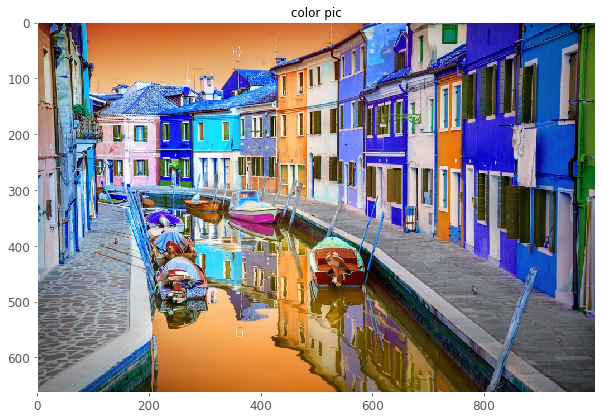

In [4]:
#visualize the uploded image
plt.imshow(image)
plt.title('color pic')
plt.show()

In [5]:
#build a function to segment image colors to rows x columns x channels
#aplly kmeans algorithm to the colors
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [6]:
#kmeans algorithm
image = get_image(image_path)
number_of_colors = 10
modified_image = image.reshape(image.shape[0]*image.shape[1], 3)
clf = KMeans(n_clusters = number_of_colors)
labels = clf.fit_predict(modified_image)

In [7]:
#setting the number of colors to 10 
counts = Counter(labels)
center_colors = clf.cluster_centers_
# We get ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

([<matplotlib.patches.Wedge at 0x1b9a34f1f70>,
 [Text(1.0621047622686517, 0.2862402382025472, '#3076cb'),
  Text(0.7173495747144396, 0.8339122181962636, '#d8d5d6'),
  Text(0.06457810816872088, 1.0981027583725256, '#605653'),
  Text(-0.7001643603060878, 0.8483925203331103, '#1e2521'),
  Text(-1.065026124257374, 0.27517150043076205, '#184b5f'),
  Text(-1.0647133542272453, -0.27637922014899907, '#897f82'),
  Text(-0.6923930925892245, -0.8547466322453279, '#b5341c'),
  Text(0.014569025623019984, -1.099903515537793, '#b6a9a4'),
  Text(0.7193144026957154, -0.8322179943227053, '#e69d50'),
  Text(1.0621156287998927, -0.28619991449860455, '#68a9e7')])

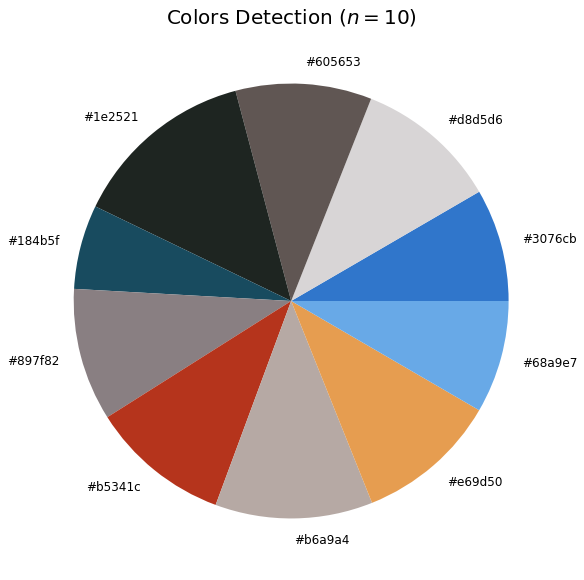

In [8]:
#plotting the visuals 
plt.title('Colors Detection ($n=10$)', fontsize=20)
plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

In [17]:
def inthreshold(array):
    count = 0
    for i in range(len(array)):
        if array[i]>=-12 and array[i]<=12:
            count=count+1
    return count

def show_color(col_index):
    color = col_index
    sub_image = (image-rgb_colors[color])
    ZEROS_VALUES = []
    COUNT = []
    for i in range(len(sub_image)):
        for j in range(len(sub_image[i])):
            e = sub_image[i,j]
            #print(e.shape)
            count = inthreshold(e)
            COUNT.append(count)
            if count==2:
                ZEROS_VALUES.append([i,j])
    color_arr=(np.zeros((16,16,3))+rgb_colors[color]).astype(int)
    normalized = sub_image - sub_image.min()
    normalized = ((sub_image/sub_image.max())*255).astype(int)
    ZEROS_IMAGE = image.copy()
    for i in range(len(ZEROS_VALUES)):
        ZEROS_IMAGE[ZEROS_VALUES[i][0],ZEROS_VALUES[i][1],:] = [250,250,250]
    plt.subplot(1,3,1)
    plt.imshow(ZEROS_IMAGE.astype(int))
    plt.subplot(1,3,2)
    plt.imshow(image)
    plt.subplot(1,3,3)
    #pwargs = {'interpolation':'nearest'}
    plt.imshow(color_arr)

In [18]:
def show_color(col_index):
    color = col_index
    sub_image = (image-rgb_colors[color])
    ZEROS_VALUES = []
    COUNT = []
    for i in range(len(sub_image)):
        for j in range(len(sub_image[i])):
            e = sub_image[i,j]
            #print(e.shape)
            count = inthreshold(e)
            COUNT.append(count)
            if count==2:
                ZEROS_VALUES.append([i,j])
    color_arr=(np.zeros((16,16,3))+rgb_colors[color]).astype(int)
    normalized = sub_image - sub_image.min()
    normalized = ((sub_image/sub_image.max())*255).astype(int)
    ZEROS_IMAGE = image.copy()
    for i in range(len(ZEROS_VALUES)):
        ZEROS_IMAGE[ZEROS_VALUES[i][0],ZEROS_VALUES[i][1],:] = [250,250,250]
    plt.subplot(1,3,1)
    plt.imshow(ZEROS_IMAGE.astype(int))
    plt.subplot(1,3,2)
    plt.imshow(image)
    plt.subplot(1,3,3)
    #pwargs = {'interpolation':'nearest'}
    plt.imshow(color_arr)

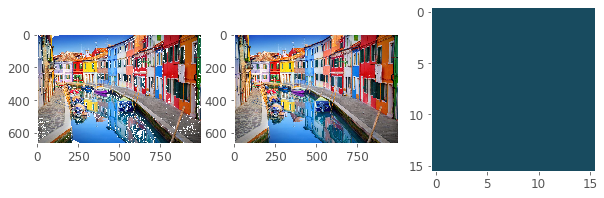

In [19]:
show_color(4)

In [11]:
#converting rgb image in integer values
for i in range (len(rgb_colors)):
    rgb_colors[i] = rgb_colors[i].astype(int)

In [12]:
#break image into smaller squares for proper identification of colors using the functions below
def square_maker():
    inp_img = image
    h = int(inp_img.shape[0])
    step_h = int(h/10)
    w = int(inp_img.shape[1])
    step_w = int(w/10)
    X = np.arange(0,h+step_h,step_h)
    Y = np.arange(0,w+step_w,step_w)
    squares = [inp_img[0:step_h,0:step_w]]
    for i in range(0,len(X)-1):
        for j in range(0,len(Y)-1):
            squares.append(inp_img[X[i]:X[i+1],Y[j]:Y[j+1]])
    return np.array(squares)[1::]

In [24]:
#pick the color that in average is closer to 0 than the others using the function below
def color_computing(array):
    DIFF = []
    squared_image = square_maker()
    for square in squared_image:
        DIFF_COLOR = []
        for color in range(len(rgb_colors)):
            diff = np.abs(square - rgb_colors[color])
            DIFF_COLOR.append(diff.mean())
        DIFF.append(DIFF_COLOR)
    return np.array(DIFF)

In [25]:
#plot the best colors using the funtion below
def best_color_plot(selected_slice):
    plt.subplot(1,2,1)
    plt.title('Retrieved Color')
    plt.imshow((np.zeros((16,16,3))+rgb_colors[color_computing(image)[selected_slice].argmin()]).astype(int))
    plt.subplot(1,2,2)
    plt.title('Selected Square:'+ str(selected_slice))
    plt.imshow(square_maker()[selected_slice])

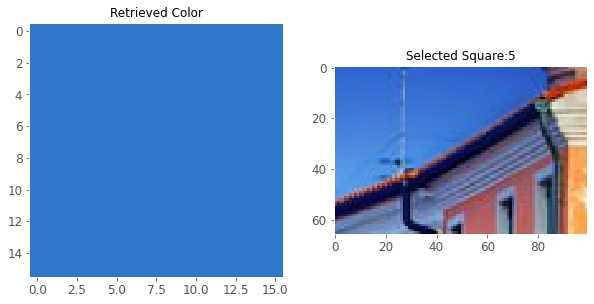

In [57]:
best_color_plot(5)

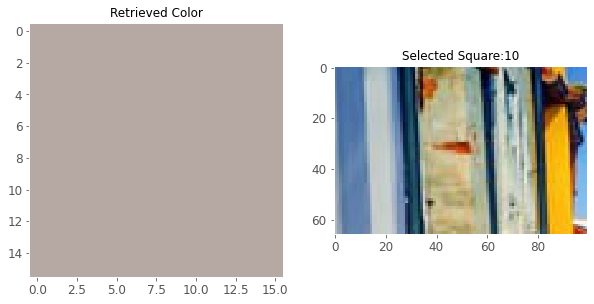

In [58]:
best_color_plot(10)

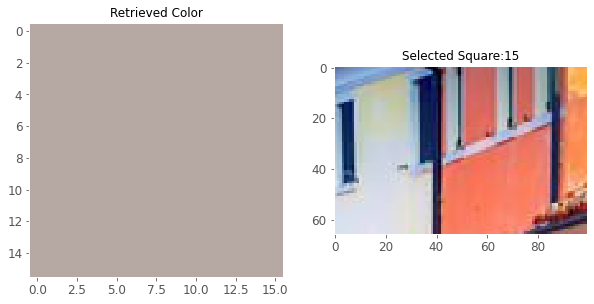

In [59]:
best_color_plot(15)

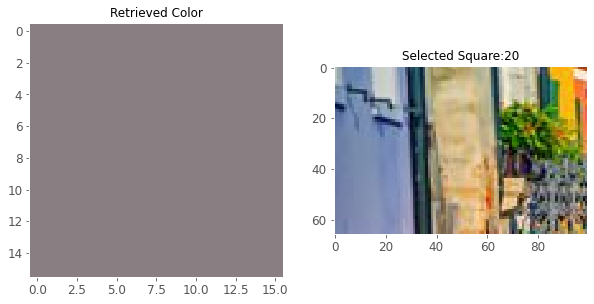

In [60]:
best_color_plot(20)

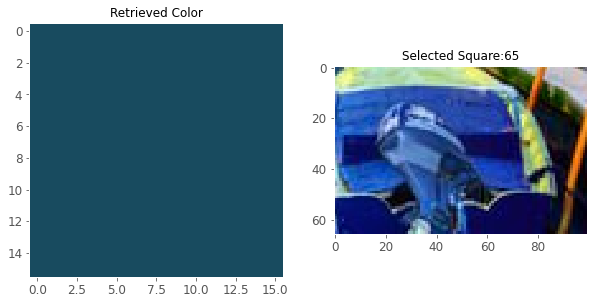

In [61]:
best_color_plot(65)

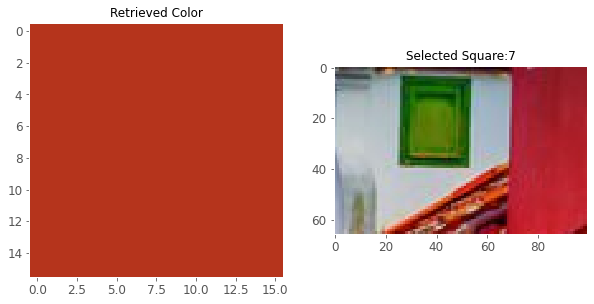

In [62]:
best_color_plot(7)

In [63]:
def build_summary():
    results = color_computing(image)
    cols = ['Square Number'] + hex_colors
    sorted_results = pd.DataFrame(columns= cols)
    k=0

    for r in results:
        d = {'Square Number':int(k)}
        for c in range(len(hex_colors)):
            d[hex_colors[c]] = r[c]*100/r.sum()
        sorted_results = sorted_results.append(d,ignore_index=True)
        k=k+1
    sorted_results['Square Number'] = sorted_results['Square Number'].astype(int)
    return sorted_results

In [64]:
summary_df = build_summary()

In [65]:
summary_df.head(20)

,Square Number,#3076cb,#d8d5d6,#605653,#1e2521,#184b5f,#897f82,#b5341c,#b6a9a4,#e69d50,#68a9e7
0,0,9.116172,16.295038,6.59535,7.875914,7.008041,8.164152,9.74128,11.462996,11.890772,11.850285
1,1,1.72259,12.233689,8.851836,12.153361,7.960221,8.353691,16.557527,10.466026,15.822131,5.878927
2,2,1.989687,11.639841,9.067921,12.867008,8.669689,8.245032,16.825776,10.078565,15.440796,5.175685
3,3,2.568132,10.840236,9.319395,13.945076,9.725579,7.989505,16.965117,9.417564,14.862741,4.366655
4,4,3.420708,10.560754,9.303754,14.53824,10.4344,7.731306,16.698465,8.983449,14.263665,4.065259
5,5,6.384856,13.461439,7.633255,12.117851,8.683507,7.28933,13.211798,9.807614,12.70515,8.705201
6,6,12.387907,12.04729,8.218919,13.211735,11.265446,7.10699,8.992627,8.071652,6.730368,11.967066
7,7,11.620583,12.468871,8.376019,11.148257,10.931656,7.902631,7.813151,8.733558,9.362136,11.643138
8,8,13.784367,16.408589,6.54342,6.146344,9.058934,8.72493,3.042784,11.548945,9.728302,15.013384
9,9,11.803416,17.548472,5.809952,6.066654,7.119744,8.608476,5.58383,12.426657,10.829995,14.202805
